## IMPORTING LIBRARIES

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


## LOADING DATASET

In [24]:

data = pd.read_csv('data/Wholesale customers data.csv')

In [26]:
print(data.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [28]:
print(data.shape)


(440, 8)


In [30]:
print(data.dtypes)


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [32]:
data.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### CLASS DISTRIBUTION AND FREQUENCY ANALYSIS FOR REGION COLUMN

In [35]:
num_classes = data['Region'].nunique() 
print(num_classes)
class_frequencies = data['Region'].value_counts()
print(class_frequencies)

3
Region
3    316
1     77
2     47
Name: count, dtype: int64


In [37]:
for class_name, frequency in class_frequencies.items():
    print(f"Class: {class_name}, Frequency: {frequency}")


Class: 3, Frequency: 316
Class: 1, Frequency: 77
Class: 2, Frequency: 47


In [39]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [41]:
print(data['Region'].value_counts())


Region
3    316
1     77
2     47
Name: count, dtype: int64


In [43]:
#Do a correalation
data.corr()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Figure size 1500x1500 with 0 Axes>

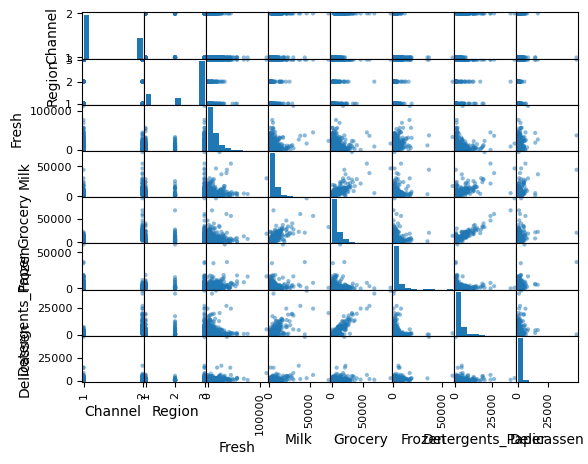

<Figure size 1500x1500 with 0 Axes>

In [45]:
#scatter
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.figure(figsize=(15,15))

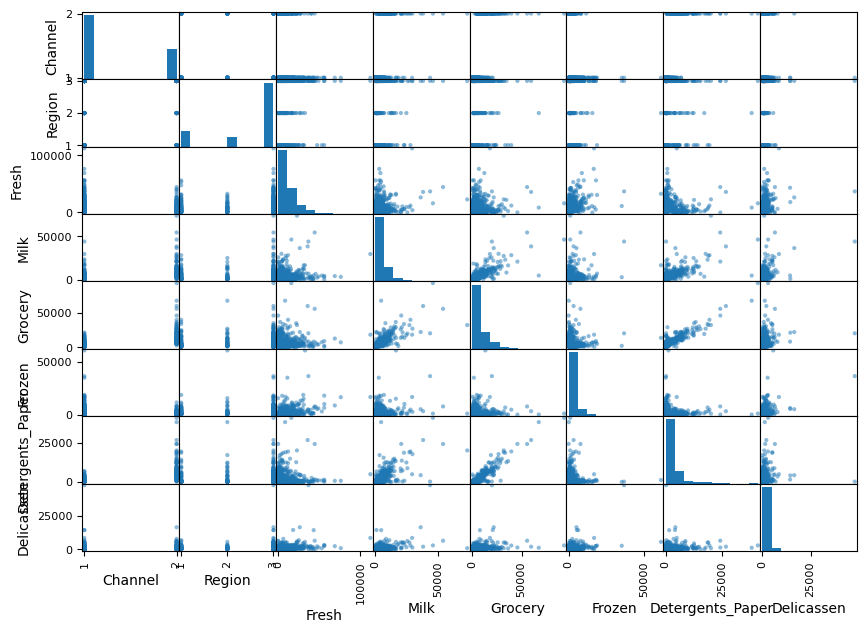

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(10, 7))

# Save the figure to the 'plots' folder
plt.savefig('plots/KNN_1.png')

# Optionally, display the plot
plt.show()


In [49]:
X = data.drop(['Region'], axis=1)
y = data['Region'] # target variable


#  SPLITTING THE DATA

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # splitting the dataset into training and testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(308, 7)
(308,)
(132, 7)
(132,)


## TRAINING A K-NEAREST NEIGHBORS CLASSIFIER 

In [55]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)

print('Validation accuracy with unscaled data', scores.mean())

Validation accuracy with unscaled data 0.6008461131676361


### EVALUATION OF K-NEAREST NEIGHBORS CLASSIFIER WITH STANDARD AND MINMAX SCALER

In [58]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)

#clf = KNeighborsClassifier()

#scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
#print(scores)
#print('Validation accuracy with StandardScaler data', scores.mean())

In [60]:
#Evaluate min max scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_train_scaled = scaler.fit_transform(X_train)
clf = KNeighborsClassifier()

scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
print(scores)
print('Validation accuracy with MinMaxScaler', scores.mean())

[0.59677419 0.62903226 0.61290323 0.67213115 0.52459016]
Validation accuracy with MinMaxScaler 0.607086197778953


### TRAINING AND VALIDATIO N ACCURACY FOR DIFFERENT VALUES

In [63]:
training_accuracy = []
validation_accuracy = []

for k in range(1,15) :
    clf = KNeighborsClassifier(n_neighbors=k) 
    clf.fit(X_train_scaled, y_train)
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    print("k: ", k , "   validation accuracy", scores.mean())
    validation_accuracy.append(scores.mean())
 

k:  1    validation accuracy 0.5000528820729773
k:  2    validation accuracy 0.38635642517186675
k:  3    validation accuracy 0.5584875727128502
k:  4    validation accuracy 0.5682178741406664
k:  5    validation accuracy 0.607086197778953
k:  6    validation accuracy 0.6492332099418296
k:  7    validation accuracy 0.675251189846642
k:  8    validation accuracy 0.6849286092014807
k:  9    validation accuracy 0.6947646747752512
k:  10    validation accuracy 0.7077736647276572
k:  11    validation accuracy 0.6980433632998413
k:  12    validation accuracy 0.6979904812268641
k:  13    validation accuracy 0.7077736647276573
k:  14    validation accuracy 0.7077736647276573


In [65]:
import matplotlib.pyplot as plt

### TRAINING K-NEAREST NEIGHBORS CLASSIFIER FOR SCALED DATA

In [68]:
clf = KNeighborsClassifier(n_neighbors=10)    
clf.fit(X_train_scaled, y_train)

# yPredict = clf.predict(X_test)
# print(accuracy_score(y_test, yPredict))

KNeighborsClassifier(n_neighbors=10)

In [70]:
X_test_scaled = scaler.transform(X_test)
print('Test Accuracy', clf.score(X_test_scaled, y_test))

Test Accuracy 0.7424242424242424


In [72]:
yhat = clf.predict(X_test_scaled)
# cm = confusion_matrix(y_test, yhat)
cm = confusion_matrix(y_test, yhat)
print("Confusion matrix: \n", cm)

Confusion matrix: 
 [[ 0  0 23]
 [ 0  0 11]
 [ 0  0 98]]


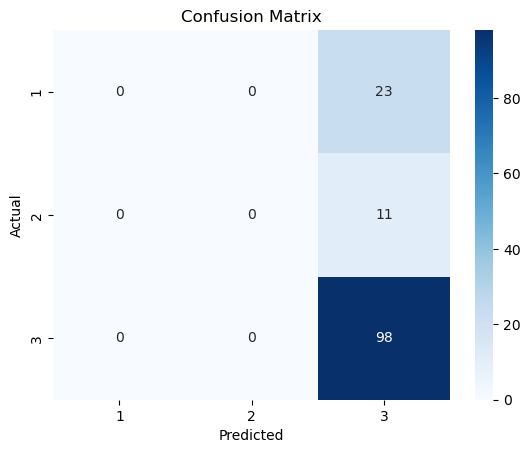

<Figure size 640x480 with 0 Axes>

In [61]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('plots/KNN_2.png')